### Random Forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)

In [ ]:
iris = load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [ ]:
train, test = df[df['is_train']==True], df[df['is_train']==False]
print('Number of observation in the training data:', len(train))
print('Number of observation in the test data:', len(test))

Number of observation in the training data: 118
Number of observation in the test data: 32


In [ ]:
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
y= pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
clf= RandomForestClassifier(n_jobs=5, random_state=10)
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=5, random_state=10)

In [ ]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
clf.predict_proba(test[features])

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.97, 0.03, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.62, 0.38],
       [0.  , 1.  , 0.  ],
       [0.  , 0.93, 0.07],
       [0.  , 0.05, 0.95],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.99, 0.01],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.03, 0.97],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.96]])

In [ ]:
preds = iris.target_names[clf.predict(test[features])]
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [ ]:
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [ ]:
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [ ]:
preds= iris.target_names[clf.predict([[5.0, 3.1, 200.1, 1.7], [5.0, 3.6, 1.4, 2.0]])]
preds

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['virginica', 'setosa'], dtype='<U10')

### SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [ ]:
# we create 40 seperable points
X, y = make_blobs(n_samples=100, centers=2, random_state=998)

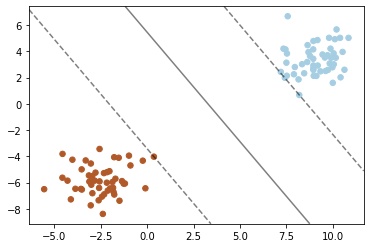

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel ='linear', C=1000)
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           alpha = 0.5, linestyles = ['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

In [ ]:
# Using to predict unknown data
newData = [[3,4],[5,6]]
print(clf.predict(newData))

[0 1]


### K-Means Clustering

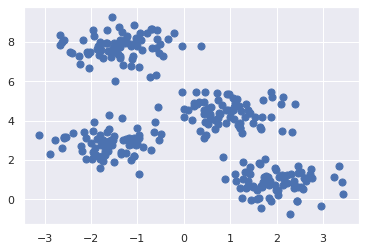

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# for plot styling

import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:,1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
  # 1. rancomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]

  while True:
    # 2a. Assign Labels based on closet center
    labels = pairwise_distances_argmin(X, centers)

    # 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

    # 2c. Check for convergence
    if np.all(centers == new_centers):
      break
    centers = new_centers
    return centers, labels

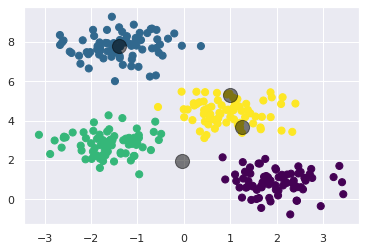

In [ ]:
  centers, labels = find_clusters(X, 4)
  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### Demo - Color compression

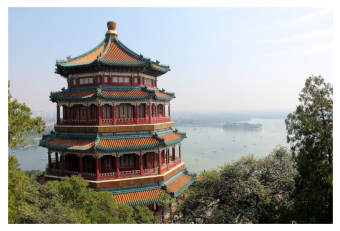

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
data = china/255.0 # use 0....1 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0,1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

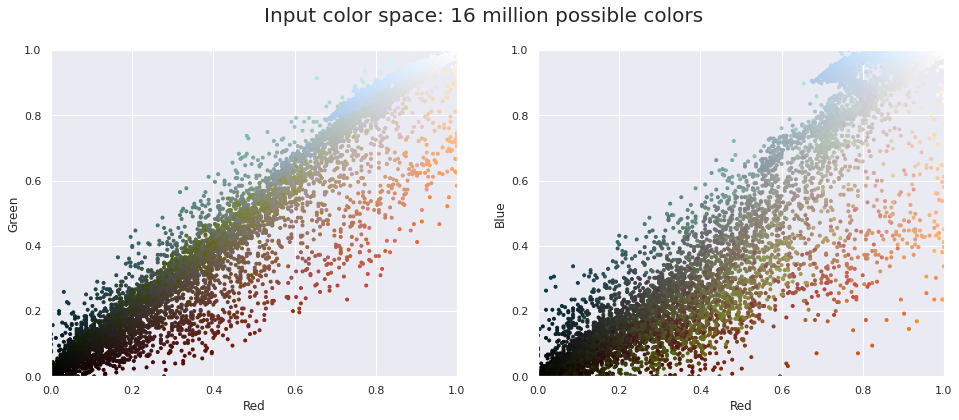

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
import warnings; warnings.simplefilter('ignore') # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

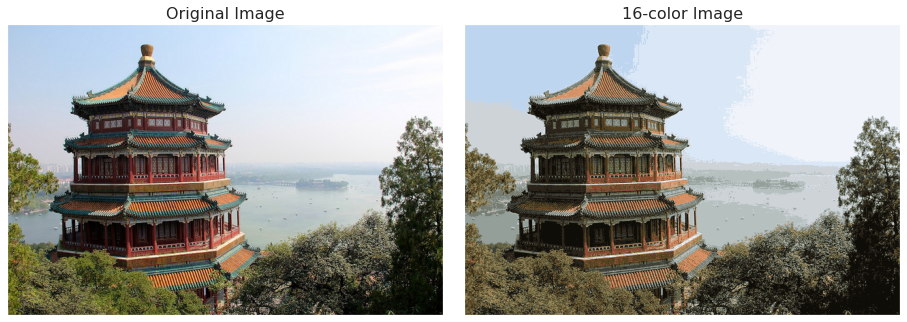

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### PCA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer['DESCR'])
print(cancer['target_names'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Virtualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [ ]:
scaled_data.shape

(569, 30)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'Second Principal Component')

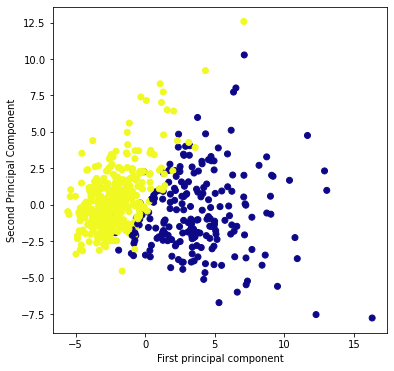

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
# Interpreting the components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

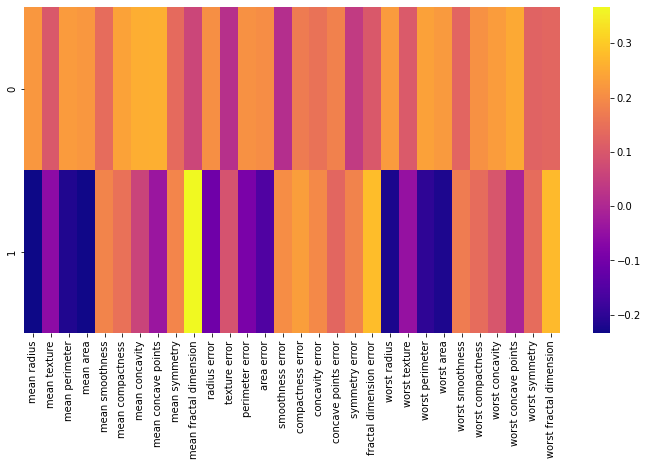

In [ ]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)